In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap
from tqdm import tqdm
import pandas as pd
import datetime
import calendar
import numpy as np

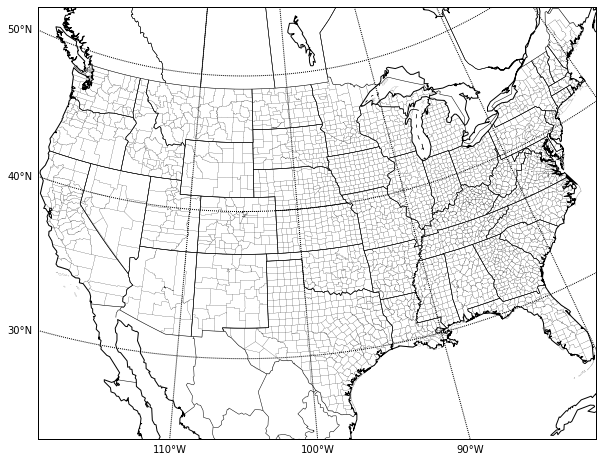

In [2]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

map = Basemap(projection='stere', lat_0=90, lon_0=-105, \
              llcrnrlat=23.41, urcrnrlat=45.44, \
              llcrnrlon=-118.67, urcrnrlon=-64.52, \
              rsphere=6371200, resolution='l', area_thresh=10000)

map.readshapefile(r'StatPlanet_USA_County\StatPlanet_USA_County\map\map', 'map', drawbounds = False)

map.drawmapboundary()
map.drawstates()
map.drawcoastlines()
map.drawcountries()    
map.drawcounties()

parallels = np.arange(0, 90, 10) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(-110, -60, 10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) 

plt.show()

In [3]:
csse_us_csv = r"COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv"
csse_us_df = pd.read_csv(csse_us_csv)

In [4]:
date = "5/12/20"

patches = []
colors = []
for info, shape in tqdm(zip(map.map_info, map.map)):
    GEOID = info["GEOID"]
    while GEOID[0] == "0":
        GEOID = GEOID[1:]
        pass
    
    df = csse_us_df.loc[csse_us_df["FIPS"].astype('str')==str(GEOID)+".0"]
    data = np.array(df[date])[0]
    
    patches.append(Polygon(np.array(shape), True))
    colors.append(data)
    pass

colors = np.array(colors)

3318it [00:05, 559.55it/s]


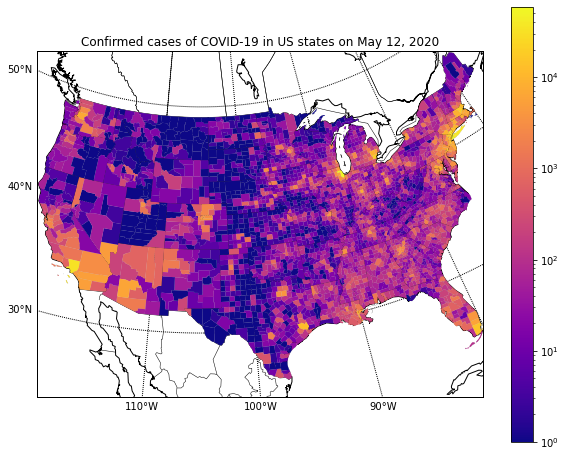

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

map = Basemap(projection='stere', lat_0=90, lon_0=-105, \
              llcrnrlat=23.41, urcrnrlat=45.44, \
              llcrnrlon=-118.67, urcrnrlon=-64.52, \
              rsphere=6371200, resolution='l', area_thresh=10000)

map.readshapefile(r'StatPlanet_USA_County\StatPlanet_USA_County\map\map', 'map', drawbounds = False)

map.drawmapboundary()
map.drawstates()
map.drawcoastlines()
map.drawcountries()    
map.drawcounties()

parallels = np.arange(0, 90, 10) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(-110, -60, 10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) 

colorsmin = min(filter(lambda x: x > 0, colors))
norm = LogNorm(vmin=colorsmin, vmax=np.max(colors))
p = PatchCollection(patches, linewidths=1, zorder=2, norm=norm, cmap="plasma")
p.set_array(np.maximum(colorsmin, colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

month, day, year = date.split("/")
title = "Confirmed cases of COVID-19 in US states on {} {}, 20{}".format(calendar.month_abbr[int(month)], day, year)
plt.title(title)

plt.savefig("map.png", dpi=300)
plt.show()